In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# !cp /content/drive/MyDrive/raw_images.zip /content

In [ ]:
# !unzip /content/raw_images.zipA

In [ ]:
# Number of Our classes
NUM_CLASSES = 8
# Fixed for Dataset color images
CHANNELS = 3
# Network config
RESNET50_POOLING_AVERAGE = 'avg'
DENSE_LAYER_ACTIVATION = 'softmax'
OBJECTIVE_FUNCTION = 'categorical_crossentropy'
# Common accuracy metric for all outputs, but can use different metrics for different output
LOSS_METRICS = ['accuracy']
# Number of Epochs
NUM_EPOCHS = 50

IMG_SIZE = (180, 180)
BATCH_SIZE = 32

In [ ]:
import os
import shutil
import matplotlib.pyplot as plt
from PIL import Image
import PIL
from torchvision import transforms

In [ ]:
def imshow(img, transform):
    img = PIL.Image.open(img)
#     fig, ax = plt.subplots(1, 2, figsize=(15, 4))
#     ax[0].set_title(f'original image {img.size}')
#     ax[0].imshow(img)
    img = transform(img)
#     ax[1].set_title(f'transformed image {img.size}')
#     ax[1].imshow(img)
    return img

In [ ]:
def splitDatasetintoFolders(IMG_SIZE):
    path = 'raw_images'
    imageList = os.listdir(path)
    loader_transform = transforms.Resize(IMG_SIZE)  #shape
    c0 = c1 = c2 = c3 = c4 = c5 = c6 = c7 = 0
    for i in imageList:
        if('bodianus' in i):
            if not os.path.exists('content/C0'):
                os.makedirs('content/C0')
            shutil.copy(path + f'/{i}', 'content/C0')
            img = imshow(f'content/C0/{i}', loader_transform)
            img.save(f'content/C0/{i}')
            c0 += 1
        elif('coris' in i):
            if not os.path.exists('content/C1'):
                os.makedirs('content/C1')
            shutil.copy(path + f'/{i}', 'content/C1')
            img = imshow(f'content/C1/{i}', loader_transform)
            img.save(f'content/C1/{i}')
            c1 += 1
        elif ('epinephelus' in i):
            if not os.path.exists('content/C2'):
                os.makedirs('content/C2')
            shutil.copy(path + f'/{i}', 'content/C2')
            img = imshow(f'content/C2/{i}', loader_transform)
            img.save(f'content/C2/{i}')
            c2 += 1
        elif ('halichoeres' in i):
            if not os.path.exists('content/C3'):
                os.makedirs('content/C3')
            shutil.copy(path + f'/{i}', 'content/C3')
            img = imshow(f'content/C3/{i}', loader_transform)
            img.save(f'content/C3/{i}')
            c3 += 1
        elif ('lethrinus' in i):
            if not os.path.exists('content/C4'):
                os.makedirs('content/C4')
            shutil.copy(path + f'/{i}', 'content/C4')
            img = imshow(f'content/C4/{i}', loader_transform)
            img.save(f'content/C4/{i}')
            c4 += 1
        elif ('lutjanus' in i):
            if not os.path.exists('content/C5'):
                os.makedirs('content/C5')
            shutil.copy(path + f'/{i}', 'content/C5')
            img = imshow(f'content/C5/{i}', loader_transform)
            img.save(f'content/C5/{i}')
            c5 += 1
        elif ('pseudanthias' in i):
            if not os.path.exists('content/C6'):
                os.makedirs('content/C6')
            shutil.copy(path + f'/{i}', 'content/C6')
            img = imshow(f'content/C6/{i}', loader_transform)
            img.save(f'content/C6/{i}')
            c6 += 1
        elif ('thalassoma' in i):
            if not os.path.exists('content/C7'):
                os.makedirs('content/C7')
            shutil.copy(path + f'/{i}', 'content/C7')
            img = imshow(f'content/C7/{i}', loader_transform)
            img.save(f'content/C7/{i}')
            c7 += 1

    return c0, c1, c2, c3,c4, c5, c6, c7

In [ ]:
print(splitDatasetintoFolders(IMG_SIZE))

(125, 92, 287, 213, 160, 319, 187, 130)


In [ ]:
from tensorflow.keras.preprocessing import image_dataset_from_directory
directory = "content"
train_dataset = image_dataset_from_directory(
    directory,
    validation_split=0.2,
    subset="training",
    seed=1337,
    label_mode = 'categorical',
    # shuffle=True,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
)

validation_dataset = image_dataset_from_directory(
    directory,
    validation_split=0.2,
    subset="validation",
    seed=1337,
    label_mode = 'categorical',
    # shuffle=True,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
)

Found 1513 files belonging to 8 classes.
Using 1211 files for training.
Found 1513 files belonging to 8 classes.
Using 302 files for validation.


['C0', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7']
tf.Tensor([0. 0. 0. 1. 0. 0. 0. 0.], shape=(8,), dtype=float32)
tf.Tensor([0. 0. 1. 0. 0. 0. 0. 0.], shape=(8,), dtype=float32)
tf.Tensor([0. 0. 0. 0. 1. 0. 0. 0.], shape=(8,), dtype=float32)
tf.Tensor([0. 0. 0. 1. 0. 0. 0. 0.], shape=(8,), dtype=float32)
tf.Tensor([0. 0. 1. 0. 0. 0. 0. 0.], shape=(8,), dtype=float32)
tf.Tensor([0. 0. 0. 0. 0. 1. 0. 0.], shape=(8,), dtype=float32)
tf.Tensor([0. 0. 0. 0. 0. 0. 0. 1.], shape=(8,), dtype=float32)
tf.Tensor([0. 0. 0. 0. 0. 0. 1. 0.], shape=(8,), dtype=float32)
tf.Tensor([0. 0. 0. 0. 0. 1. 0. 0.], shape=(8,), dtype=float32)


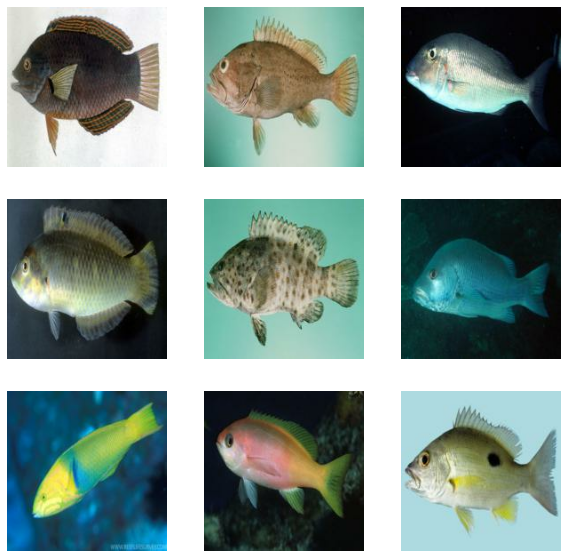

In [ ]:
class_names = train_dataset.class_names
print(class_names)
plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        # plt.title(class_names[labels[i]])
        print(labels[i])
        plt.axis("off")

In [ ]:
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Flatten, Conv2D, Activation, MaxPooling2D
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.initializers import random_uniform, glorot_uniform, constant, identity
from keras.regularizers import l2

data_augmentation = keras.Sequential(
    [   
        
        layers.experimental.preprocessing.RandomFlip("horizontal", input_shape=(180, 180, 3)),
        layers.experimental.preprocessing.RandomRotation(0.1),
        layers.experimental.preprocessing.RandomZoom(0.1),
        # layers.experimental.preprocessing.Rescaling(1./255)
    ]
)



def make_model(shape):
    

    model = Sequential([
            data_augmentation,
            # layers.experimental.preprocessing.Rescaling(1./255),
            layers.Conv2D(16, kernel_size=(5,5), strides=(2,2), padding='same'),
            Activation('relu'),
            # layers.MaxPooling2D(),
            BatchNormalization(),
            layers.Conv2D(32, 3, padding='same'),
            Activation('relu'),
            layers.MaxPooling2D(pool_size=(2,2)),
            BatchNormalization(),
            layers.Conv2D(64, 3, padding='same'),
            Activation('relu'),
            layers.MaxPooling2D(pool_size=(2,2)),
            layers.Flatten(),
            BatchNormalization(),
            layers.Dropout(0.2),
            layers.Dense(128, activation='relu'),
            layers.Dropout(0.2),
            layers.Dense(64, activation='relu'),
            layers.Dense(8, activation = 'softmax')
            ])

    return model

model = make_model(IMG_SIZE + (3,))

model.summary()

callbacks = [
    keras.callbacks.ModelCheckpoint("save_at_{epoch}.h5"),
]

from tensorflow.keras import optimizers
Adamm = optimizers.Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.899, decay = 1e-06)

model.compile(optimizer = Adamm, loss = OBJECTIVE_FUNCTION, metrics = LOSS_METRICS)
model.fit(train_dataset, epochs=NUM_EPOCHS, validation_data=validation_dataset, batch_size=32, callbacks=callbacks)
model.save_weights('best.h5')
keras.utils.plot_model(model, show_shapes=True)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 90, 90, 16)        1216      
_________________________________________________________________
activation (Activation)      (None, 90, 90, 16)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 90, 90, 16)        64        
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 90, 90, 32)        4640      
_________________________________________________________________
activation_1 (Activation)    (None, 90, 90, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 45, 45, 32)       

In [ ]:

# model.fit(train_dataset, epochs=NUM_EPOCHS, validation_data=validation_dataset, batch_size=32, callbacks=callbacks)